## Obesity Levels Based On Eating Habits and Physical Condition

### The dataset contains 2111 rows and 17 columns, with a mix of categorical and numerical variables. Here's a breakdown of the key columns:

- **Numerical variables**: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

- **Categorical variables**: Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

### Dataset

Each row in the dataset represents one individual eating habits and physical condition and nutritional behavior. Columns with the description :
- **Gender** - Male or Female
- **Age**:  A person's age may affect their metabolic rate and lifestyle, influencing obesity levels.
- **Height**: Useful for calculating Body Mass Index (BMI), which is closely related to obesity.
- **Weight**: One of the most critical variables for determining obesity.
- **Family_History_with_Overweight**: Whether a person has a genetic predisposition to being overweight or obese, which can significantly impact obesity risk.
- **FAVC** (Frequent Consumption of High-Calorie Food): This reflects dietary habits, particularly the consumption of high-calorie foods, which is a known risk factor for obesity.
- **FCVC** (Frequency of Consumption of Vegetables): A higher intake of vegetables is typically associated with a healthier diet and lower risk of obesity.
- **NCP** (Number of Meals): The number of meals consumed daily can impact weight gain, especially if portion sizes are not controlled.
- **CAEC** (Consumption of Food Between Meals): Eating snacks or meals outside of regular eating hours can contribute to weight gain.
- **SMOKE** (Smoking Habit): Smoking status can influence metabolism and overall health, affecting obesity.
- **CH20** (Water Intake: Adequate water intake can aid in digestion and prevent overeating, indirectly influencing weight management.
- **CALC** (Calories Consumed): Regular or frequent alcohol consumption adds extra calories, contributing to weight gain.
- **FAF** (Physical Activity Frequency): Frequency of physical activity is a key factor in energy expenditure and weight control.
- **TUE** (Time Spent Using Technology): Time spent on technology or screens is often linked to sedentary behavior, which can contribute to obesity.
- **MTRANS** (Transportation Mode): The mode of transportation, such as walking or using public transportation, reflects levels of physical activity in daily life.

The target column is **NObeyesdad** - Obesity level, which we will try to predict based on the other features in the dataset.

*Attributes related with eating habits are:*

    - Frequent consumption of high caloric food (FAVC),

    - Frequency of consumption of vegetables (FCVC),

    - Number of main meals (NCP),

    - Consumption of food between meals (CAEC),

    - Consumption of water daily (CH20),

    - Consumption of alcohol (CALC).


*Attributes related with the physical condition are:*

    - Calories consumption monitoring (SCC),

    - Physical activity frequency (FAF),

    - Time using technology devices (TUE),

    - Transportation used (MTRANS),

*Other variables were:*

    - Gender

    - Age

    - Height

    - Weight

This dataset was obtained from the UCI Machine Learning Repository, a well-known resource for datasets in the machine learning community.

### Import required packages and dataset


In [579]:
%load_ext dotenv
%dotenv 

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [580]:
# %load ../src/DataManager.py
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os



def get_data(file_path):
    '''Loads data from a given location.'''
    print(f'Getting data from {file_path}')
    df_raw = pd.read_csv(file_path)
    return df_raw

def rename_columns(df, columnName):
    return df.rename(columns = columnName)

def drop_duplicates(df):
    return df.drop_duplicates()

def find_outliers_IQR(df,numeric_col):
   
   q1=df[numeric_col].quantile(0.25)
   q3=df[numeric_col].quantile(0.75)
   IQR=q3-q1
   outliers = df[((df[numeric_col]<(q1-1.5*IQR)) | (df[numeric_col]>(q3+1.5*IQR)))]
   return outliers

In [581]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys

sys.path.append(os.getenv('SRC_DIR'))

### Load the data set into dataframe

In [582]:
obesity_df = get_data('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_df.shape

Getting data from ../data/ObesityDataSet_raw_and_data_sinthetic.csv


(2111, 17)

### Display basic information about the dataset

In [583]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Renaming the columns for better readability


In [584]:

columnName = {'family_history_with_overweight': 'Family_History', 
                                          'FAVC' : 'High_Cal_Foods_Frequently', 
                                          'FCVC': 'Freq_Veg', 'NCP': 'Num_Meals', 
                                          'CAEC': 'Snacking',
                                          'SMOKE': 'Smoke',
                                          'CH2O': 'Water_Intake', 
                                          'SCC': 'Calorie_Monitoring' , 
                                          'FAF': 'Phys_Activity', 
                                          'TUE': 'Tech_Use', 'CALC':
                                          "Freq_Alcohol", 
                                          'MTRANS': 'Transportation', 
                                          'NObeyesdad': 'Obesity_Level'}


obesity_df_renamed = rename_columns(obesity_df, columnName)

In [585]:
obesity_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2111 non-null   object 
 1   Age                        2111 non-null   float64
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Family_History             2111 non-null   object 
 5   High_Cal_Foods_Frequently  2111 non-null   object 
 6   Freq_Veg                   2111 non-null   float64
 7   Num_Meals                  2111 non-null   float64
 8   Snacking                   2111 non-null   object 
 9   Smoke                      2111 non-null   object 
 10  Water_Intake               2111 non-null   float64
 11  Calorie_Monitoring         2111 non-null   object 
 12  Phys_Activity              2111 non-null   float64
 13  Tech_Use                   2111 non-null   float

In [586]:
obesity_df_renamed.describe()

,Age,Height,Weight,Freq_Veg,Num_Meals,Water_Intake,Phys_Activity,Tech_Use
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data Preprocessing
In this section, we will perform the following data quality checks to ensure the dataset is clean and ready for analysis:

1. **Check for Missing or Null Values**  
   Identify any missing or null values in the dataset and handle them appropriately (e.g., imputation or removal).

2. **Check for Uniqueness in Categories**  
   Verify the uniqueness of categorical data to ensure there are no inconsistencies or redundancies in the categories.

3. **Check for Duplicates**  
   Identify and remove duplicate rows to avoid redundant data that may skew the analysis.

4. **Check for Outliers**  
   Detect and handle outliers in numerical data using statistical methods or visualization techniques (e.g., boxplots, z-scores, or IQR).

In [587]:
numerical_columns = obesity_df_renamed.select_dtypes(include=['float64', 'int64']).columns
cat_columns = obesity_df_renamed.select_dtypes(include=['object']).columns

### Missing values or null values

In [588]:
# Find missing values

obesity_df_renamed.isna().sum()

Gender                       0
Age                          0
Height                       0
Weight                       0
Family_History               0
High_Cal_Foods_Frequently    0
Freq_Veg                     0
Num_Meals                    0
Snacking                     0
Smoke                        0
Water_Intake                 0
Calorie_Monitoring           0
Phys_Activity                0
Tech_Use                     0
Freq_Alcohol                 0
Transportation               0
Obesity_Level                0
dtype: int64

From the above analysis, we can confirm that the dataset does not contain any missing or null values. This ensures that no additional imputation or handling for missing data is required.

In [589]:
obesity_df_renamed.isnull().sum() # check for null values

Gender                       0
Age                          0
Height                       0
Weight                       0
Family_History               0
High_Cal_Foods_Frequently    0
Freq_Veg                     0
Num_Meals                    0
Snacking                     0
Smoke                        0
Water_Intake                 0
Calorie_Monitoring           0
Phys_Activity                0
Tech_Use                     0
Freq_Alcohol                 0
Transportation               0
Obesity_Level                0
dtype: int64

Similarly with missing values data doesn't have any null values.


### Uniqueness Check for Categorical Variables

In this step, we analyze the categorical variables to ensure their values are unique and consistent. This involves:

1. Identifying all categorical columns in the dataset.
2. Checking the unique values in each categorical column.
3. Verifying that no redundant or inconsistent categories exist.


In [590]:
# Get unique values for all categorical variables

unique_values_per_column = {col: obesity_df_renamed[col].unique() for col in cat_columns}
# Display unique values for each column
for col, unique_vals in unique_values_per_column.items():
    print(f"Unique values in '{col}': {unique_vals}")


Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Family_History': ['yes' 'no']
Unique values in 'High_Cal_Foods_Frequently': ['no' 'yes']
Unique values in 'Snacking': ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in 'Smoke': ['no' 'yes']
Unique values in 'Calorie_Monitoring': ['no' 'yes']
Unique values in 'Freq_Alcohol': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in 'Transportation': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values in 'Obesity_Level': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


***Results:***  
The analysis confirms that all categorical variables have unique and consistent values, with no irregularities detected.

### Check for Duplicates

In this step, we identify and handle duplicate rows in the dataset to ensure data integrity. The process includes:

1. Scanning the dataset for duplicate entries.
2. Counting the total number of duplicate rows (if any).
3. Removing duplicates to avoid redundant data affecting the analysis.

In [591]:
# Find duplicated values

obesity_df_renamed.duplicated().sum()

24

### <span style='color:green'> Observation - 24 values are duplicate </span>

In [592]:
# Show duplicated values if needed

#obesity_df_renamed[obesity_df_renamed.duplicated(keep=False)]

### Remove duplicates

In [593]:
# remove duplicates from the dataset

data = drop_duplicates(obesity_df_renamed)
data.shape

(2087, 17)

### Redefining Numerical and Categorical Columns

After a detailed analysis of the dataset, we re-evaluated and reclassified the columns into **numerical** and **categorical** types based on their properties. This ensures the data is accurately prepared for analysis and modeling.

---

#### **Numerical Columns (Continuous):**
These columns represent continuous variables with measurable values that can take fractional numbers:

- **Age**: Represents the age of individuals.
- **Height**: Height of individuals (likely in meters or centimeters).
- **Weight**: Weight of individuals (likely in kilograms).
- **FCVC**: Frequency of vegetable consumption. It contains continuous values reflecting varying levels of consumption.
- **CH2O**: Daily water consumption (e.g., in liters). Includes fractional values.
- **FAF**: Physical activity frequency, measured as a continuous variable with fractional values.
- **TUE**: Time spent using technology, represented as continuous values.

---

#### **Categorical Columns:**
These columns represent discrete categories or labels:

- **Gender**: Male or Female.
- **family_history_with_overweight**: Indicates whether there is a family history of being overweight (Yes/No).
- **FAVC**: Represents the frequent consumption of high-caloric food (Yes/No).
- **CAEC**: Categorizes the frequency of food consumption between meals (e.g., Always, Frequently, Sometimes, Never).
- **SMOKE**: Indicates smoking status (Yes/No).
- **SCC**: Represents whether calorie consumption is monitored (Yes/No).
- **CALC**: Frequency of alcohol consumption (e.g., Never, Sometimes, Frequently, Always).
- **MTRANS**: Mode of transportation (e.g., Walking, Public Transport, Private Car, Bike).
- **NObeyesdad**: Obesity level classification (e.g., Normal Weight, Overweight, Obese).
- **NCP**: Originally in cont variable now categoircal. Number of main meals per day. Although it contains numerical values, these represent discrete categories (e.g., 1, 2, 3 meals).

---

### **Explanation**
This reclassification ensures:
1. **Accurate Analysis**: Continuous variables are treated numerically, enabling statistical operations like mean, standard deviation, and modeling.
2. **Correct Encoding**: Categorical variables can be encoded (e.g., one-hot encoding) for machine learning models while preserving their categorical nature.
3. **Avoiding Misinterpretation**: Features like **NCP** (Number of Main Meals) are categorized correctly as they represent discrete choices, not fractional or continuous measures.

By clearly defining the data types, this preparation sets the foundation for effective data preprocessing, exploration, and modeling.


### Outlier Detection

In this step, we analyze numerical variables to identify and handle potential outliers. Outliers are extreme values that can skew the analysis and affect model performance. The process includes:

1. **Visualization Techniques:**  
   - Using boxplots to visually identify outliers in numerical data.
   - Plotting histograms or scatter plots to detect irregular distributions.

2. **Statistical Methods:**  
   - Calculating z-scores to detect data points that are far from the mean.
   - Applying the Interquartile Range (IQR) method to identify values outside the acceptable range:  

3. **Handling Outliers:**  
   - Reviewing whether outliers are genuine or due to errors.
   - Deciding whether to remove, transform, or retain outliers based on their relevance to the analysis.



In [594]:
# Refining numerical and categorical columns

# Create variables for categorical and numerical columns
categorical_columns = [
    'Gender', 'Family_History', 'High_Cal_Foods_Frequently', 'Snacking',
    'Smoke', 'Calorie_Monitoring', 'Freq_Alcohol', 'Transportation', 'Obesity_Level', 'Num_Meals'
]
numerical_columns = [
    'Age', 'Height', 'Weight', 'Freq_Veg', 'Water_Intake', 'Phys_Activity', 'Tech_Use'
]

categorical_columns, numerical_columns

(['Gender',
  'Family_History',
  'High_Cal_Foods_Frequently',
  'Snacking',
  'Smoke',
  'Calorie_Monitoring',
  'Freq_Alcohol',
  'Transportation',
  'Obesity_Level',
  'Num_Meals'],
 ['Age',
  'Height',
  'Weight',
  'Freq_Veg',
  'Water_Intake',
  'Phys_Activity',
  'Tech_Use'])

In [595]:
numeric_columns = numerical_columns
for column in numeric_columns:
    outliers = find_outliers_IQR(data, column)
    
    if outliers.empty:
        print(f"No outliers detected in column {column}")
    else:
        print(f"{len(outliers)} outliers detected in column {column}")
        print("Max outlier value:", str(outliers[column].max()))
        print("Min outlier value:", str(outliers[column].min()))
   

167 outliers detected in column Age
Max outlier value: 61.0
Min outlier value: 35.194089
1 outliers detected in column Height
Max outlier value: 1.98
Min outlier value: 1.98
1 outliers detected in column Weight
Max outlier value: 173.0
Min outlier value: 173.0
No outliers detected in column Freq_Veg
No outliers detected in column Water_Intake
No outliers detected in column Phys_Activity
No outliers detected in column Tech_Use


### Boxplot visualisation for Outliers detection
We will visualize only the columns we have outliers

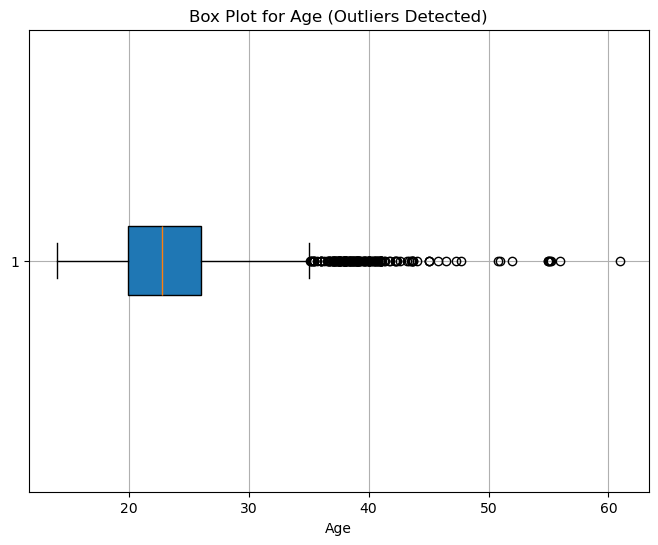

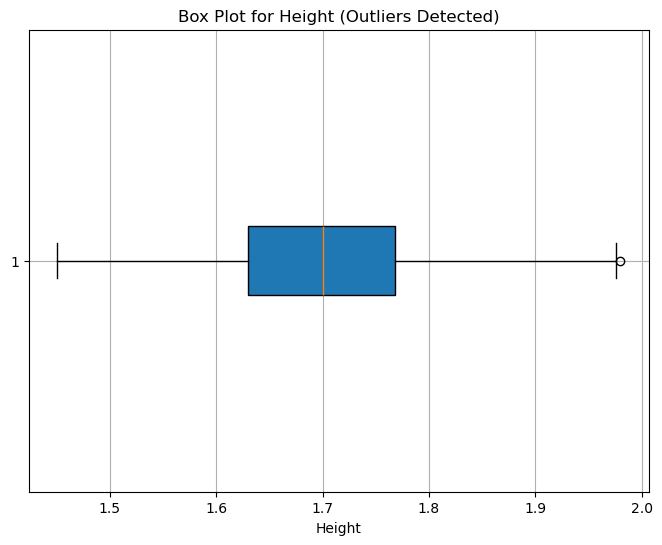

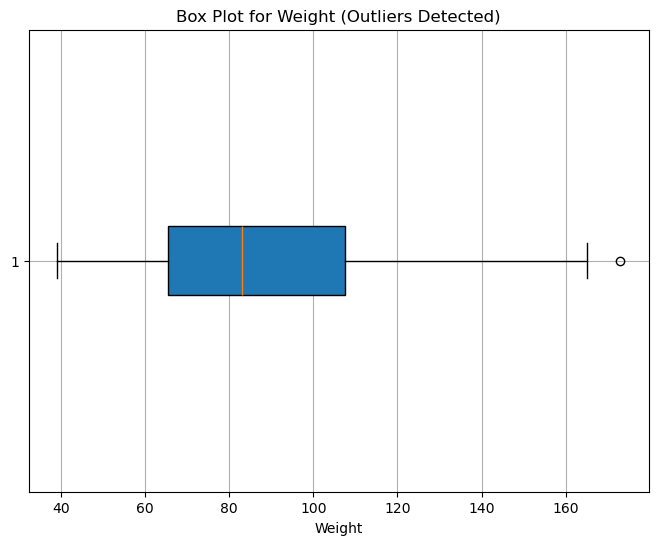

In [596]:
for column in numerical_columns:
    outliers = find_outliers_IQR(obesity_df_renamed, column)
    if not outliers.empty:  # Only plot if outliers are present
        plt.figure(figsize=(8, 6))
        plt.boxplot(obesity_df_renamed[column].dropna(), vert=False, patch_artist=True)
        plt.title(f"Box Plot for {column} (Outliers Detected)")
        plt.xlabel(column)
        plt.grid(True)
        plt.show()

### <span style='color:green'> Observation - There are many outliers in Age and NCP. NCP is number of meals consumed daily and its values are known to fall between 1 and 4. Therefore, we can confidently conclude that there are no outliers in this variable. We will explore the Age variable in greater detail using a box plot in the data visualization section. </span>



### Data Visulaization

### 1. Age distribution across different obesity levels (NObeyesdad)

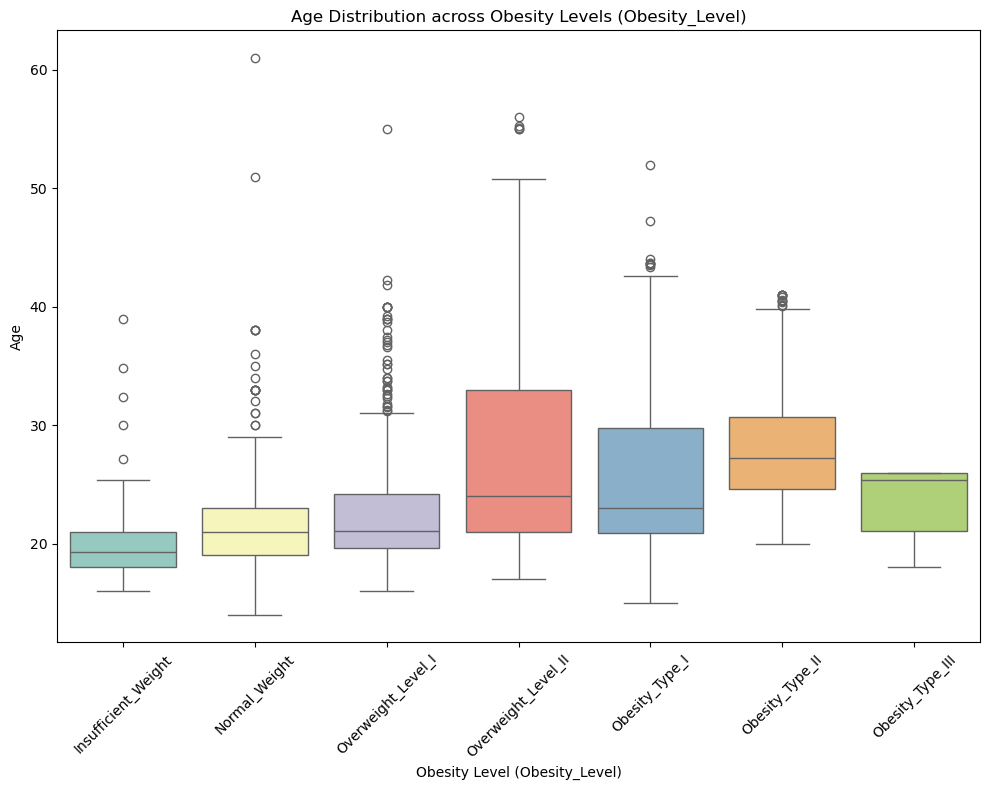

In [597]:
# Age distribution across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
nobeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  # Adjust according to your dataset
sns.boxplot(x='Obesity_Level', y='Age', data=obesity_df_renamed, palette='Set3', order=nobeyesdad_order)
plt.title('Age Distribution across Obesity Levels (Obesity_Level)')
plt.xlabel('Obesity Level (Obesity_Level)')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style='color:green'>Observation - Age variable ranges between 14 and 61, and at this point, we have decided not to remove any data as outliers from the dataset.</<span> 

### 2. Distribution of different target labels (NObeyesdad)

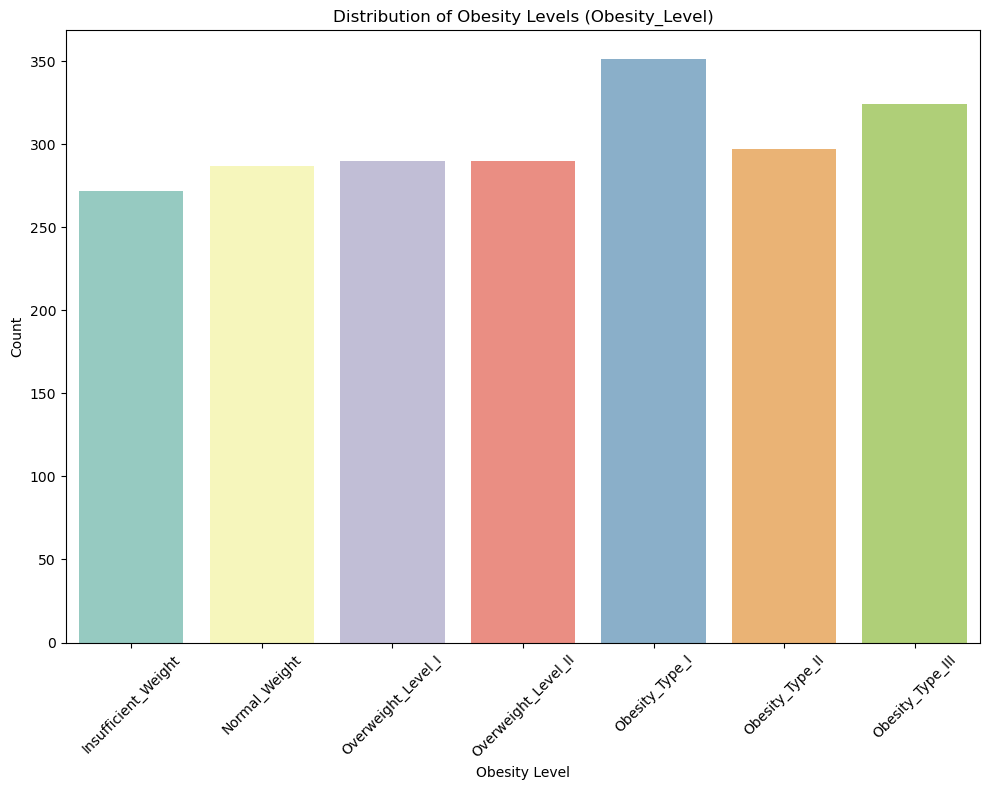

In [598]:


plt.figure(figsize=(10,8))
sns.countplot(x='Obesity_Level', data=obesity_df_renamed, palette='Set3', order=nobeyesdad_order)
plt.title('Distribution of Obesity Levels (Obesity_Level)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style='color:green'>Observation  - We can see Obesity type I has highest percentage and then is Obestity_type III </span>


### 3. Draw Pairplot to explore relationships between numerical variables

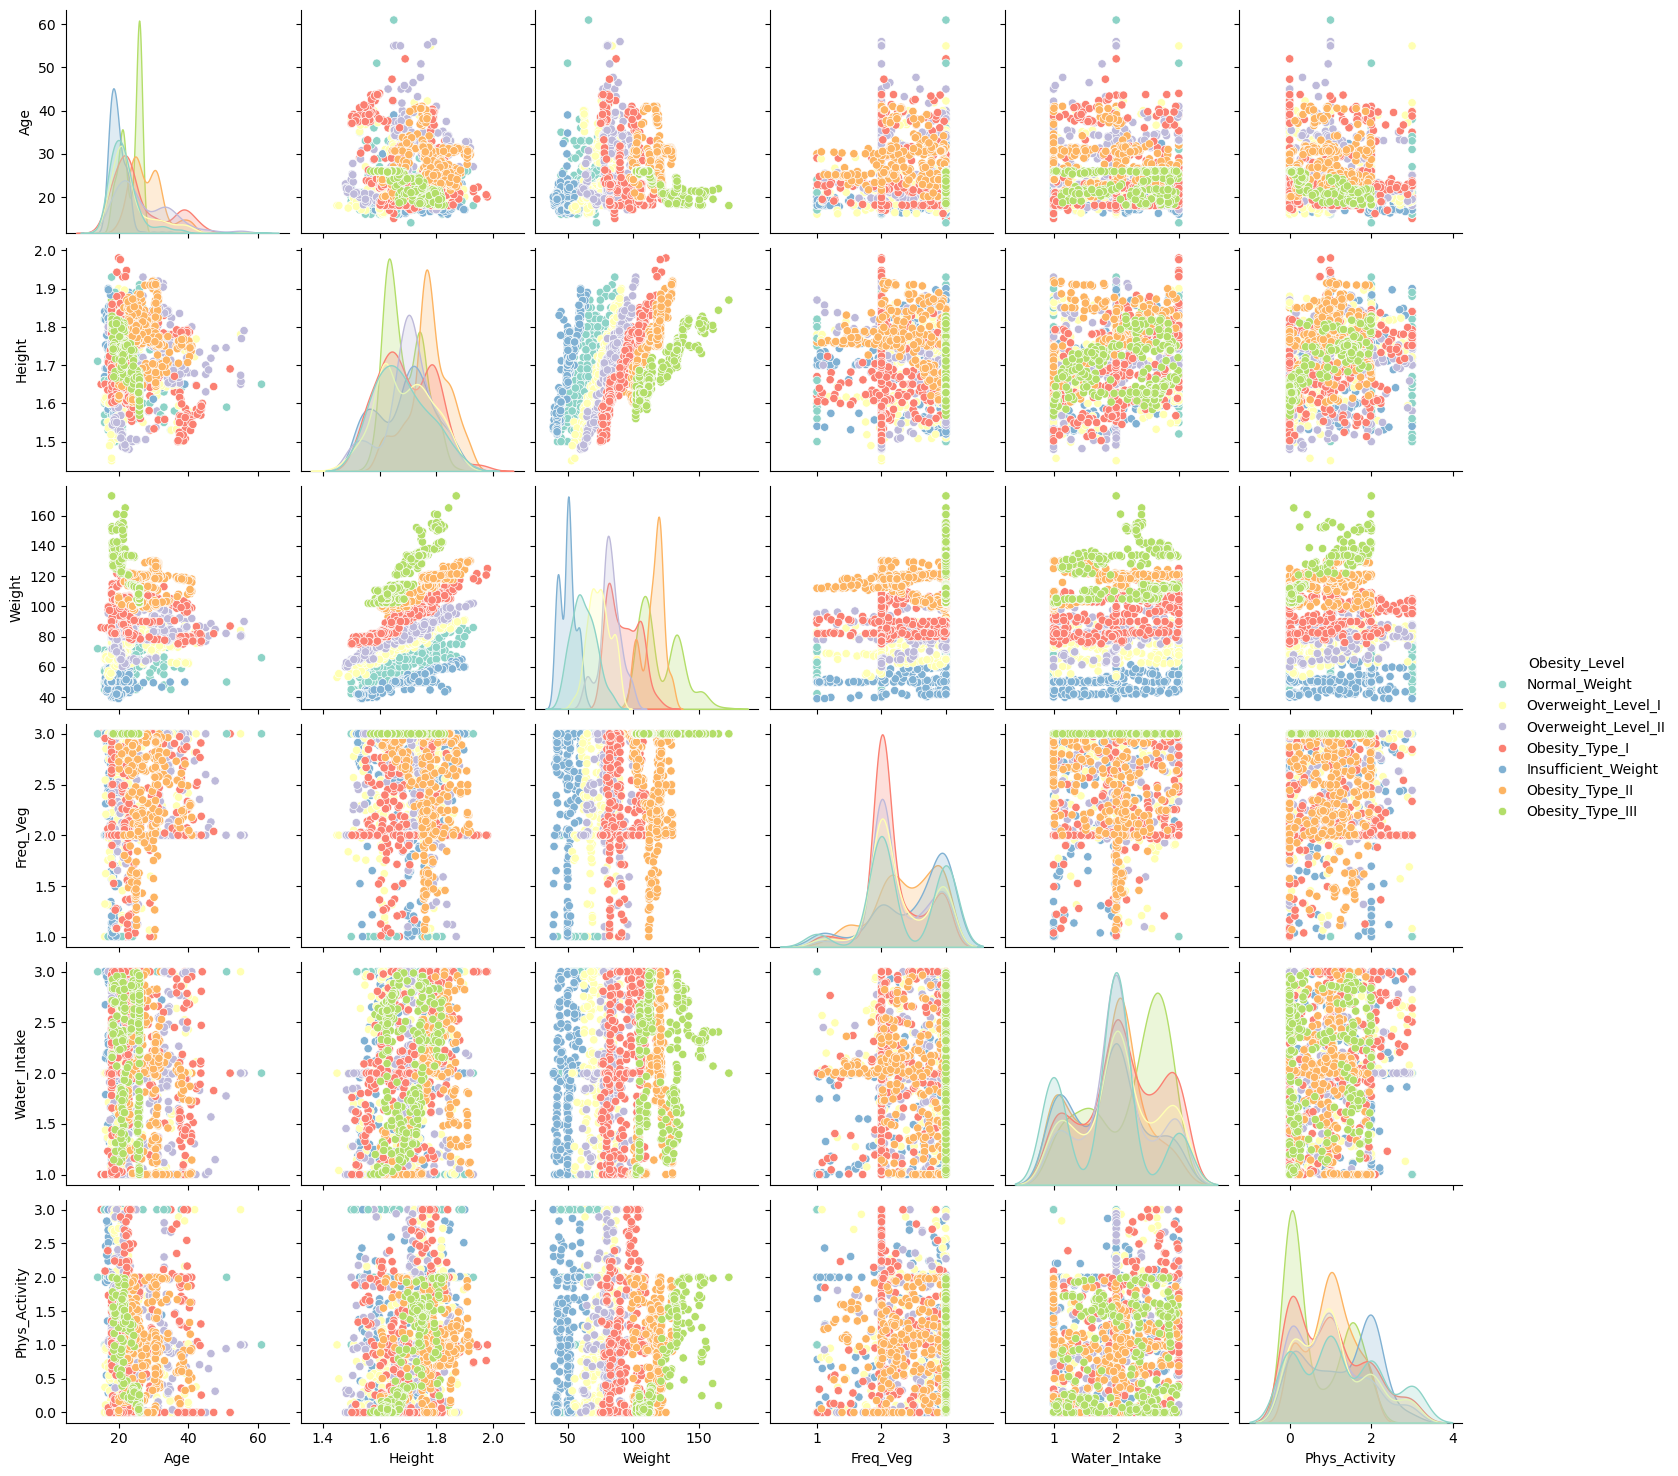

In [599]:

sns.pairplot(obesity_df_renamed[['Age', 'Height', 'Weight', 'Freq_Veg', 'Water_Intake', 'Phys_Activity', 'Obesity_Level']], hue='Obesity_Level', palette='Set3')
plt.show()

### Categorical Column relationship with target

In [600]:
categorical_var = obesity_df_renamed.select_dtypes(include=['object']).columns
categorical_var

Index(['Gender', 'Family_History', 'High_Cal_Foods_Frequently', 'Snacking',
       'Smoke', 'Calorie_Monitoring', 'Freq_Alcohol', 'Transportation',
       'Obesity_Level'],
      dtype='object')

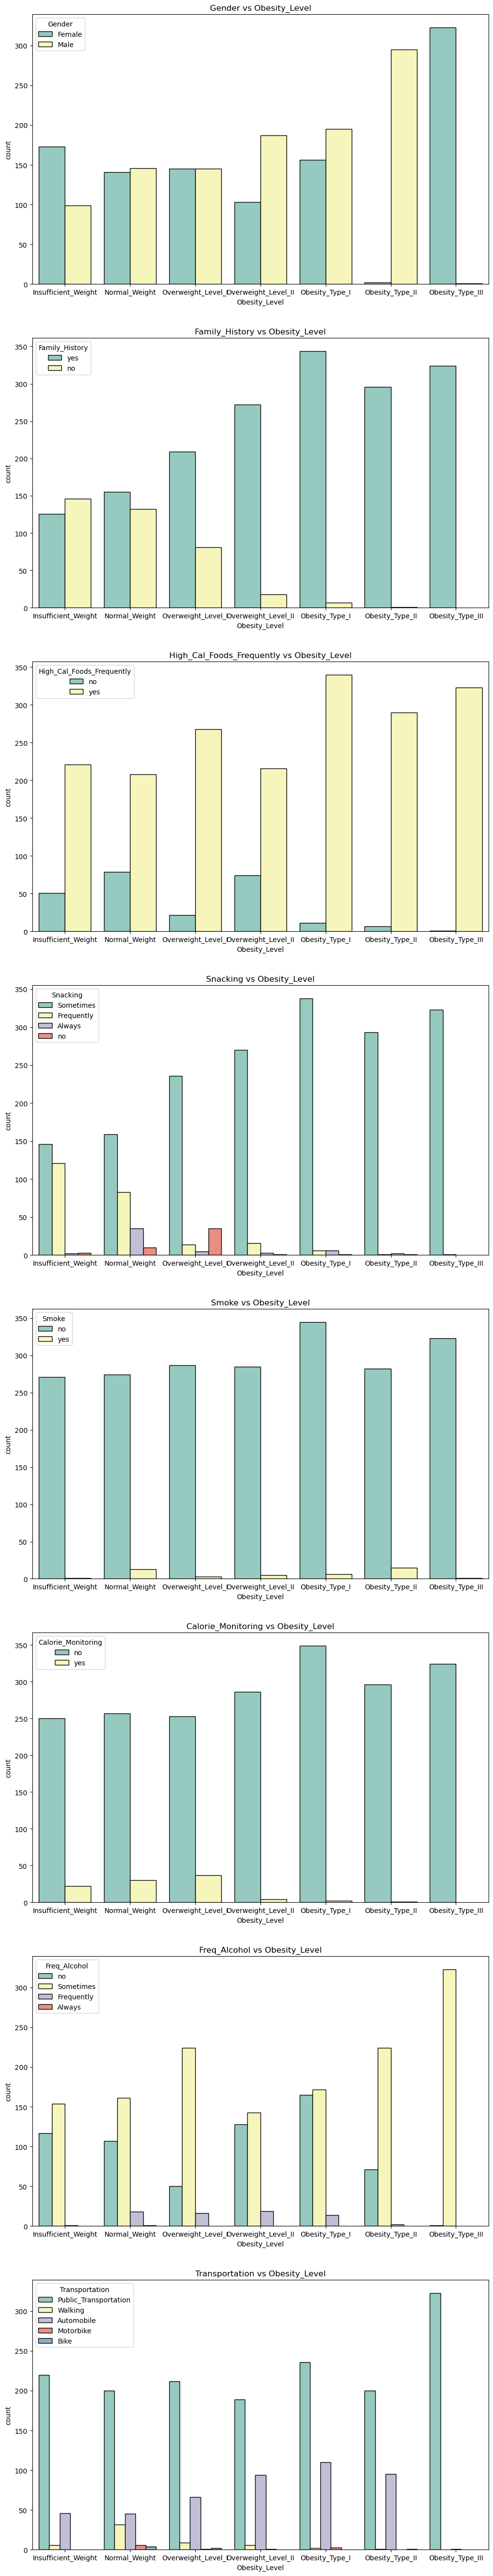

In [601]:
plt.figure(figsize = (12,170))
counter =1
for var in categorical_var:
    if counter < len(categorical_var):
        plt.subplot(20,1,counter)
        plt.title(f"{var} vs Obesity_Level")
        sns.countplot(x = "Obesity_Level" ,order=nobeyesdad_order, hue = var, data = obesity_df_renamed,edgecolor="black", palette='Set3')
    counter +=1
plt.show()

### 4. Correlation Analysis

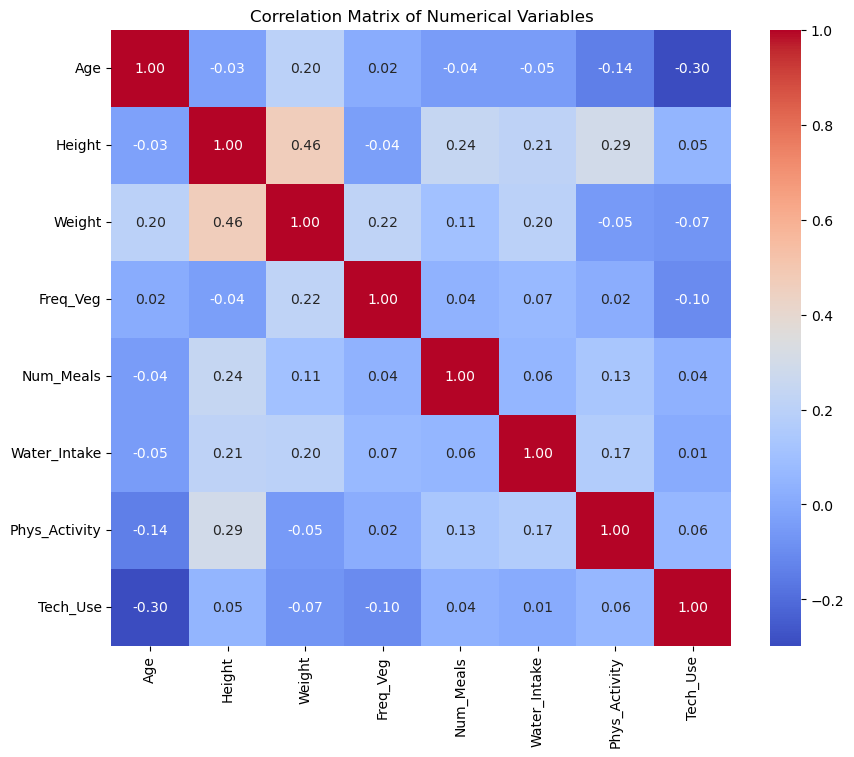

In [602]:
# Let's start by performing correlation analysis, pair plots, and creating distribution plots.
# Create a heatmap for the correlation matrix using only numerical columns
# Automatically select numerical columns
numerical_columns = obesity_df_renamed.select_dtypes(include=['float64', 'int64']).columns
numerical_correlation_matrix = obesity_df_renamed[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### <span style='color:green'> Observation - We noticed a relatively strong positive correlation between the Weight and Height. </span>

<b>We will define a new variable (BMI = Weight/Height^2).</b>

### Feature Enginerring - Adding a new column **BMI** and explore its relationship with other features.

In [603]:
# Define new variable of BMI

obesity_df_renamed['BMI'] = obesity_df_renamed['Weight'] / (obesity_df_renamed['Height'] ** 2)

### BMI distribution across different obesity levels (NObeyesdad)

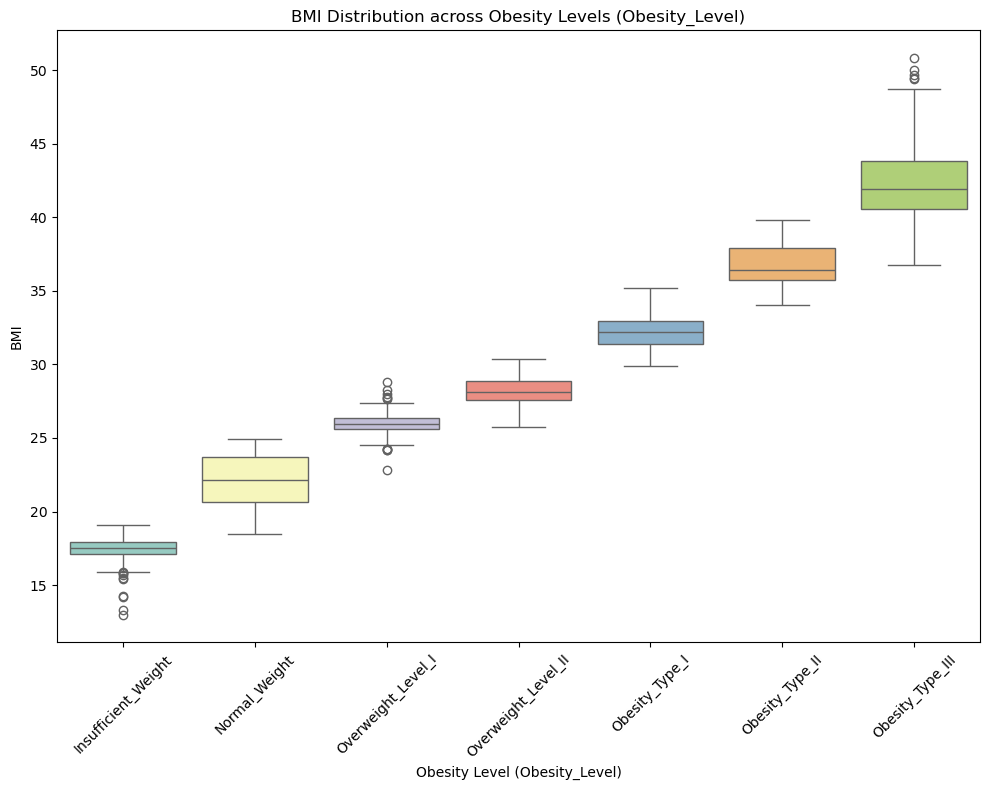

In [604]:
# BMI distribution across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
nobeyesdad_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  # Adjust according to your dataset
sns.boxplot(x='Obesity_Level', y='BMI', data=obesity_df_renamed, palette='Set3', order=nobeyesdad_order)
plt.title('BMI Distribution across Obesity Levels (Obesity_Level)')
plt.xlabel('Obesity Level (Obesity_Level)')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <span style='color:green'>Observation - The box plot effectively illustrates how BMI increases progressively with the severity of obesity levels. The spread of the data becomes wider with higher obesity categories, indicating more variation in BMI as obesity severity increases. Conversely, the Normal Weight and Insufficient Weight categories show more tightly grouped BMI distributions.</span>

### BMI distribution across different Genders

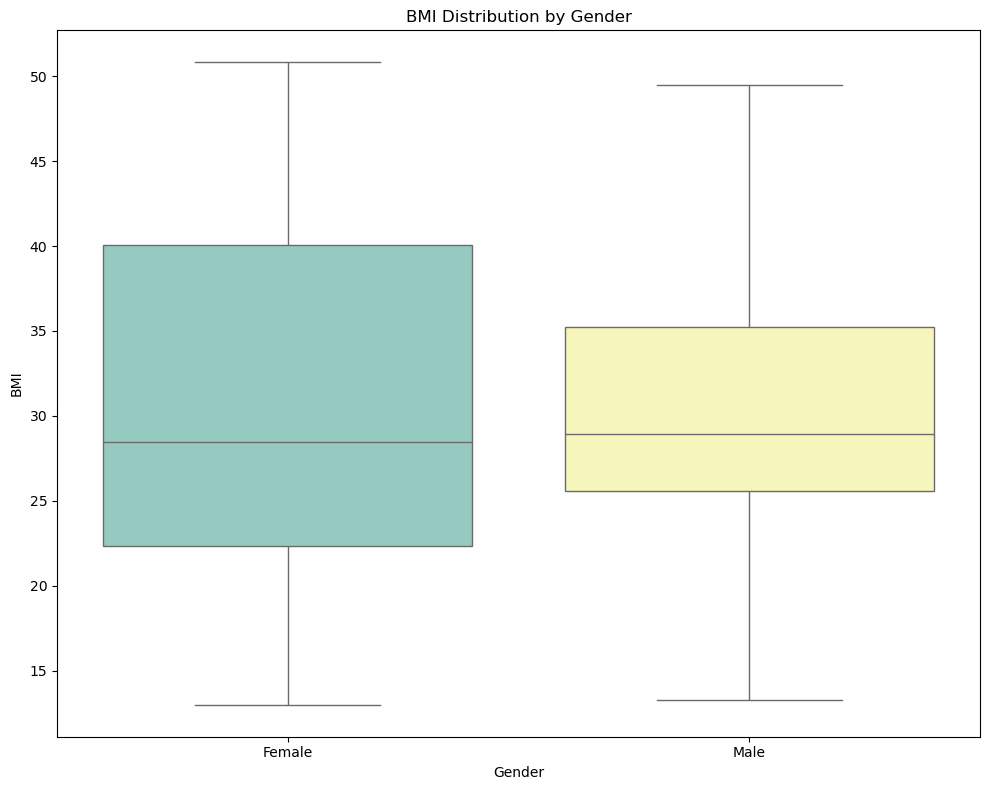

In [605]:
# BMI distribution across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.boxplot(x='Gender', y='BMI', data=obesity_df_renamed, palette='Set3')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'>Observation - The plot shows that females, on average, tend to have a higher and more varied BMI compared to males. The broader spread of BMI values in females suggests more diversity in body composition within this group.</span>

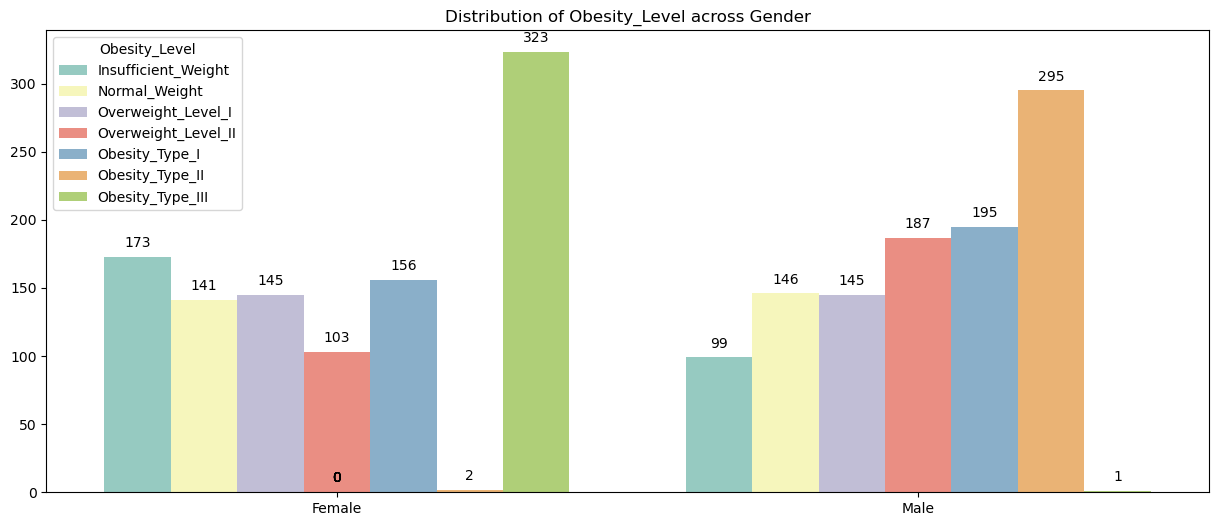

In [606]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = "Gender", hue = "Obesity_Level",hue_order=nobeyesdad_order, data = obesity_df_renamed, palette='Set3')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2, p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0,10),
               textcoords = 'offset points')

plt.title("Distribution of Obesity_Level across Gender")
plt.xlabel('')
plt.ylabel('')


plt.show()

### <span style='color:green'>Observation - 1) Obesity Type III is predominantly observed in females, 2) Obesity Type II is predominantly observed in males.</span>

### BMI distribution by Age across different obesity levels (NObeyesdad)

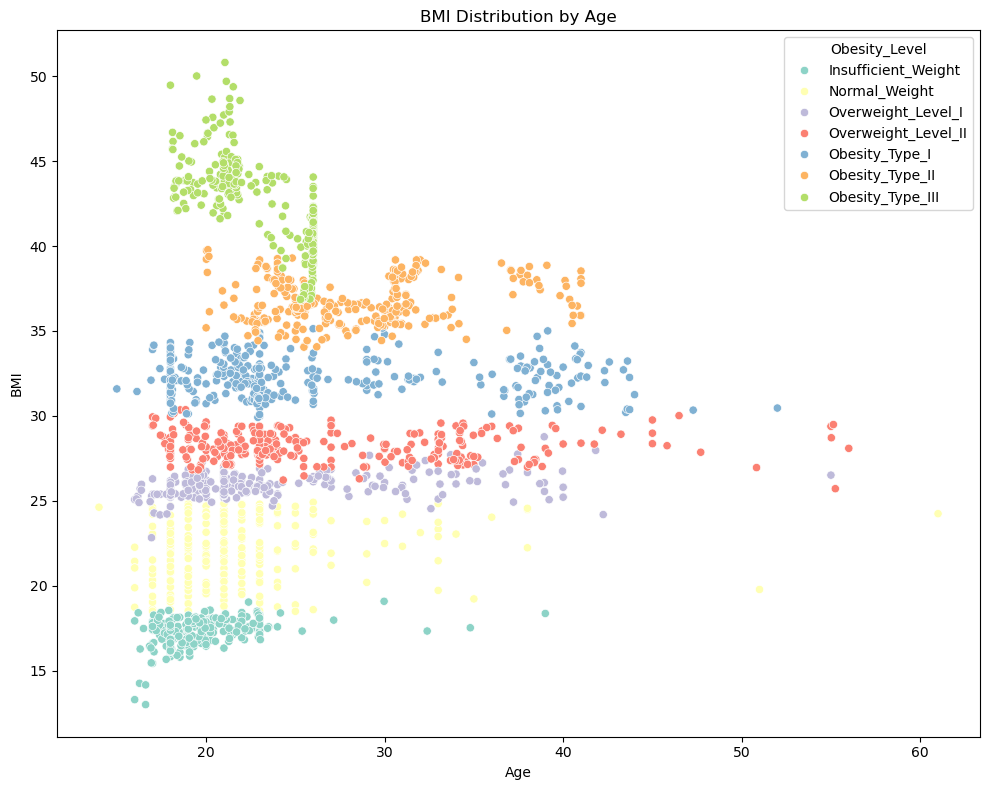

In [607]:
# BMI distribution by Age across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='BMI', data=obesity_df_renamed, hue_order= nobeyesdad_order,hue='Obesity_Level', palette='Set3')

plt.title('BMI Distribution by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'> Observation - Obesity type III is more commonly observed in individuals under the age of 30. </span>

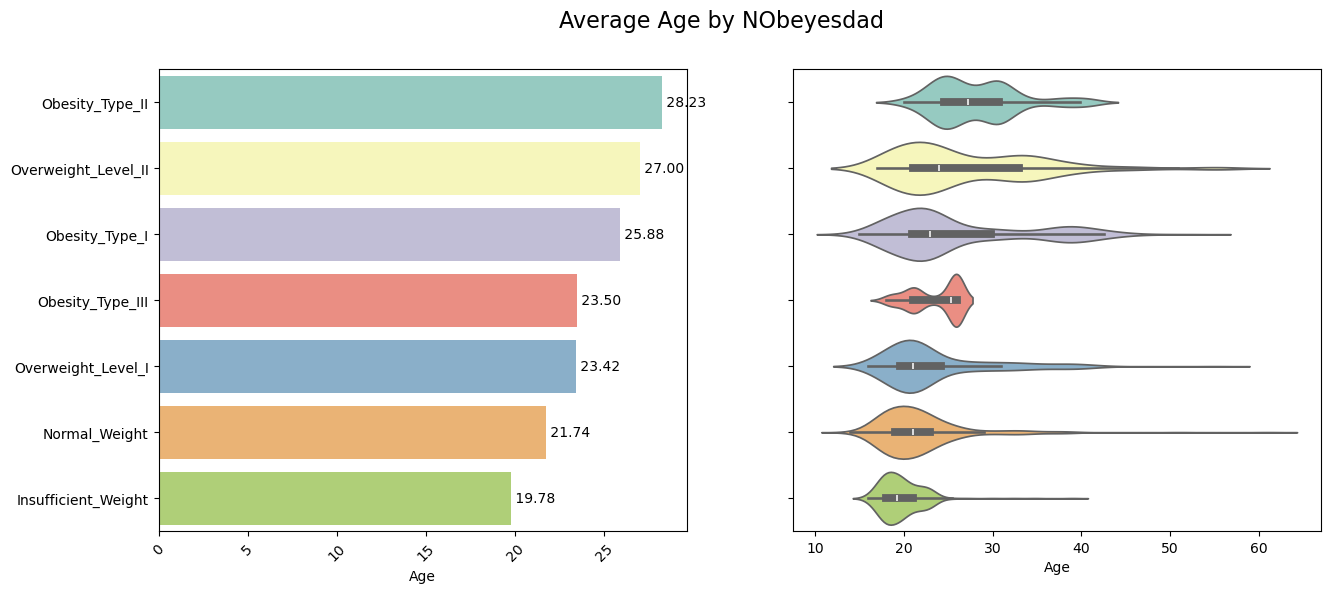

In [608]:

nobe_bmi_mean = obesity_df_renamed.groupby('Obesity_Level')['Age'].mean().reset_index()

nobe_bmi_mean_sorted = nobe_bmi_mean.sort_values(by='Age', ascending = False)

fig, axes = plt.subplots(1,2,figsize=(15,6))
sns.barplot(y='Obesity_Level', x='Age',ax=axes[0],data=nobe_bmi_mean,order=nobe_bmi_mean_sorted['Obesity_Level'],palette='Set3')

for index, row in enumerate(nobe_bmi_mean_sorted.iterrows()):
    axes[0].text(row[1]['Age'], index, f"{row[1]['Age']: .2f}", va = 'center', ha = 'left', fontsize = 10)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.violinplot(y = "Obesity_Level", x= "Age", data= obesity_df_renamed, ax=axes[1], order=nobe_bmi_mean_sorted['Obesity_Level'],palette='Set3')
axes[1].set_ylabel('')
axes[1].set_yticklabels([])

fig.suptitle('Average Age by NObeyesdad', fontsize = 16)
plt.show()

### <span style='color:green'> Observation - Normal Weight or Insufficient weight people seems to be younger on an average than the rest </span>

### BMI distribution by Family History with Overweight across different obesity levels (NObeyesdad)

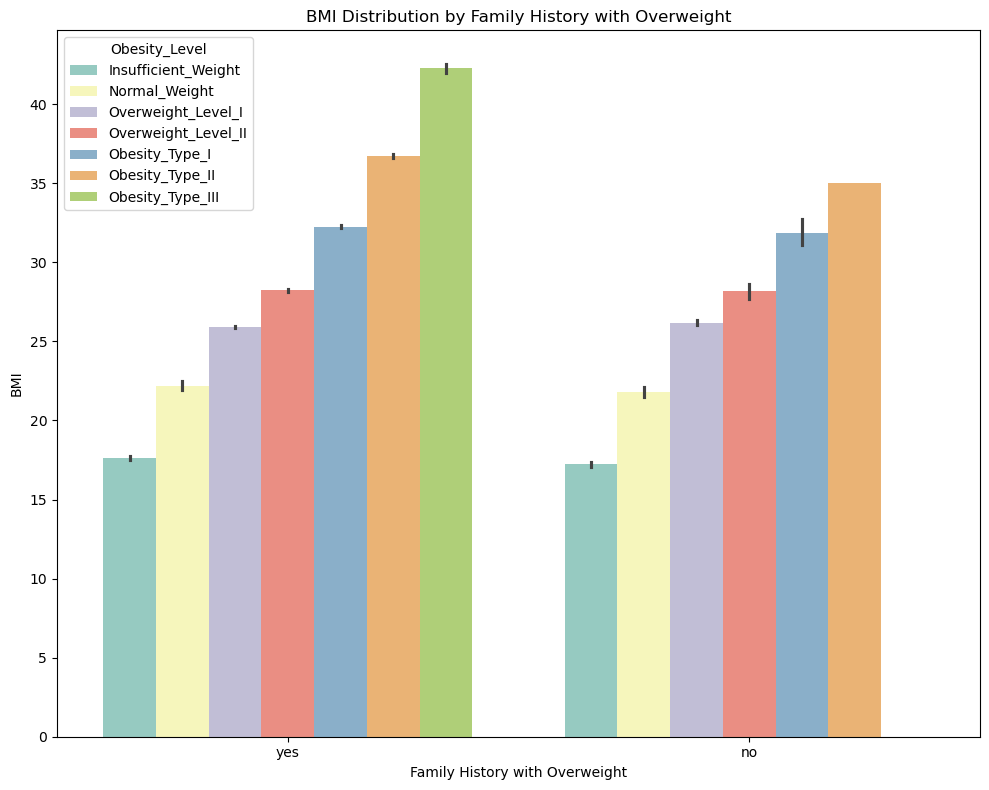

In [609]:
# BMI distribution by Family History with Overweight across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))

# Define the desired order of FAVC categories and NObeyesdad levels

family_history_with_overweight_order = ['yes', 'no']  

# Create the barplot with the specified order

sns.barplot(x='Family_History', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', 
            palette='Set3', order=family_history_with_overweight_order, hue_order=nobeyesdad_order)

plt.title('BMI Distribution by Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'> Observation - No cases of obesity level III have been observed in individuals without a family history of overweight, suggesting that family history plays a significant role, at least in the development of obesity level III. </span>

### BMI distribution by Frequent Consumption of High-Calorie Food (FAVC) across different obesity levels (NObeyesdad)

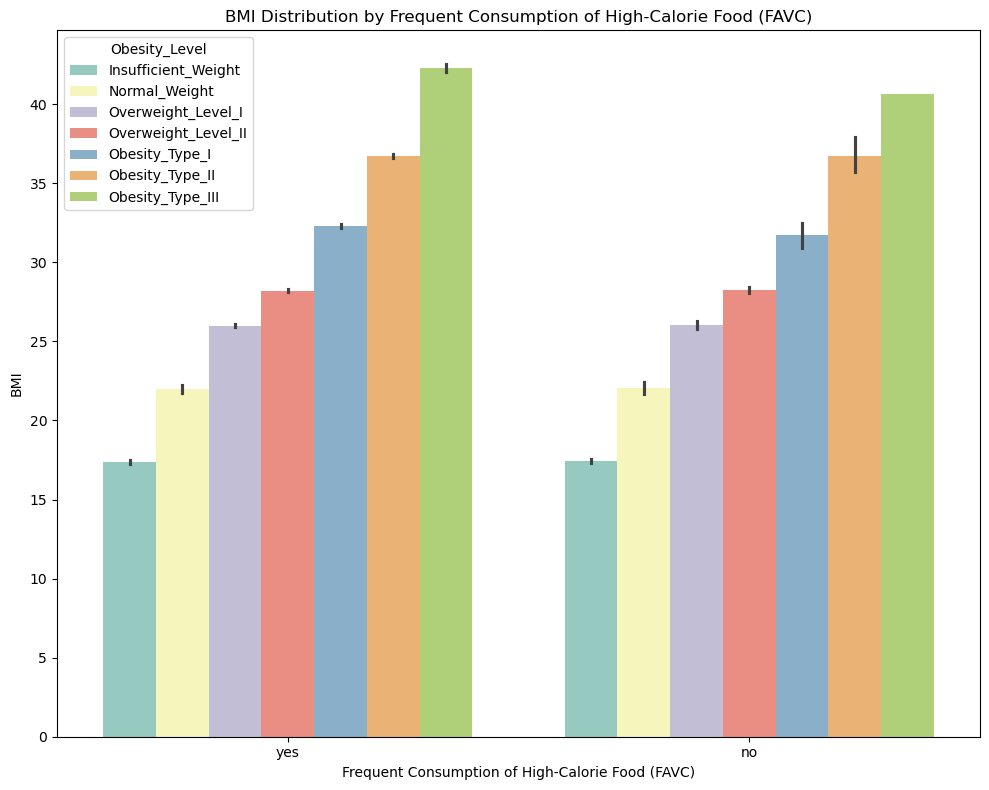

In [610]:
# BMI distribution by Frequent Consumption of High-Calorie Food (FAVC) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10, 8))

# Define the desired order of FAVC categories and NObeyesdad levels

favc_order = ['yes', 'no']  

# Create the barplot with the specified order

sns.barplot(x='High_Cal_Foods_Frequently', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', 
            palette='Set3', order=favc_order, hue_order=nobeyesdad_order)

plt.title('BMI Distribution by Frequent Consumption of High-Calorie Food (FAVC)')
plt.xlabel('Frequent Consumption of High-Calorie Food (FAVC)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'> Observation - There is only one case of Obesity Type III where frequent consumption of high-calorie food is not present, suggesting that frequent consumption of high-calorie food likely plays a key role in the development of Obesity Type III. For other types of obesity and normal weight individuals, the distribution of high-calorie food consumption appears to be similar across all levels.<span>

### BMI distribution by Frequency of Consumption of Vegetables (FCVC) across different obesity levels (NObeyesdad)

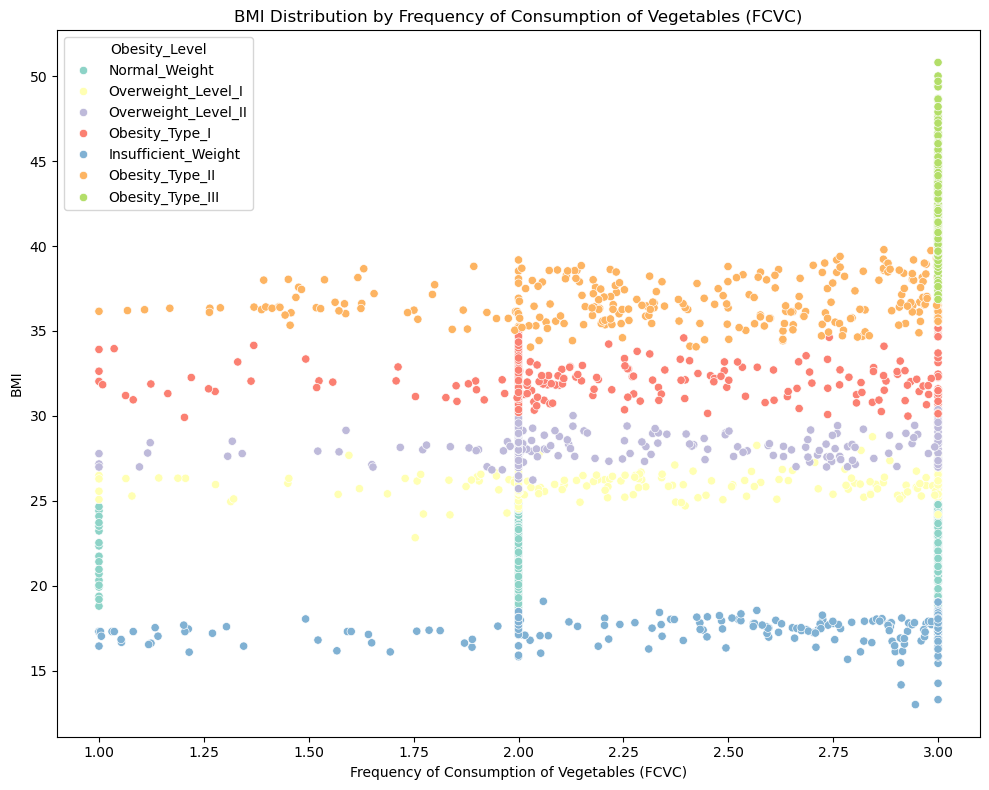

In [611]:
# BMI distribution by Frequency of Consumption of Vegetables (FCVC) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Freq_Veg', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', palette='Set3')

plt.title('BMI Distribution by Frequency of Consumption of Vegetables (FCVC)')
plt.xlabel('Frequency of Consumption of Vegetables (FCVC)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style ='color:green'> Observation - Individuals with Obesity Type III have the highest frequency of vegetable consumption.</span>

### BMI distribution by Number of Meals (NCP) across different obesity levels (NObeyesdad)

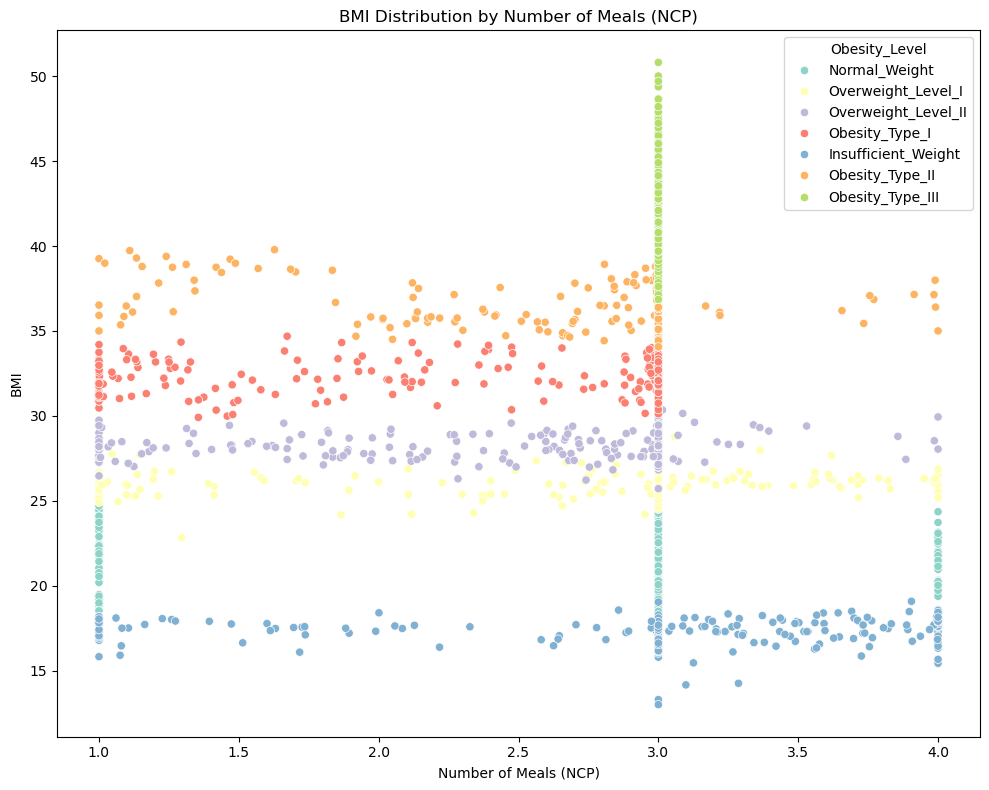

In [612]:
# BMI distribution by Number of Meals (NCP) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Num_Meals', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', palette='Set3')

plt.title('BMI Distribution by Number of Meals (NCP)')
plt.xlabel('Number of Meals (NCP)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style="color:green"> Observation - Obestiy type III are mostly consuming 3 meals where as normal weight people are consuming 1, 3 or 4 meals </span>

### BMI distribution by Consumption of Food Between Meals (CAEC) across different obesity levels (NObeyesdad)

In [613]:
obesity_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2111 non-null   object 
 1   Age                        2111 non-null   float64
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Family_History             2111 non-null   object 
 5   High_Cal_Foods_Frequently  2111 non-null   object 
 6   Freq_Veg                   2111 non-null   float64
 7   Num_Meals                  2111 non-null   float64
 8   Snacking                   2111 non-null   object 
 9   Smoke                      2111 non-null   object 
 10  Water_Intake               2111 non-null   float64
 11  Calorie_Monitoring         2111 non-null   object 
 12  Phys_Activity              2111 non-null   float64
 13  Tech_Use                   2111 non-null   float

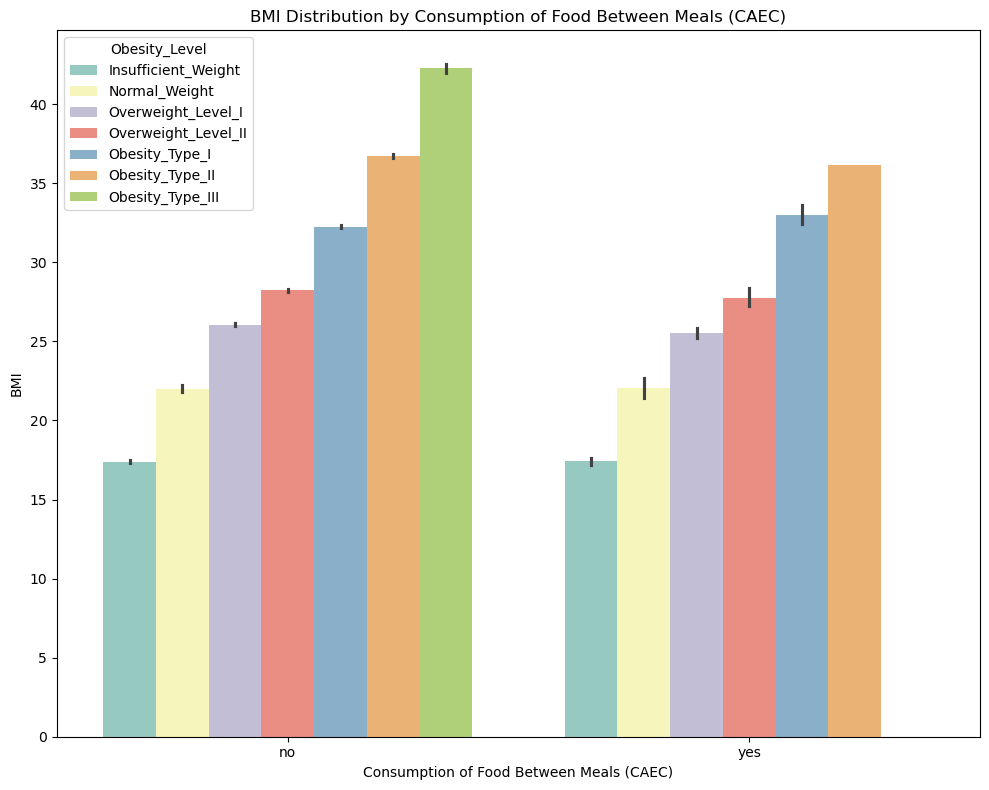

In [614]:
# BMI distribution by Consumption of Food Between Meals (CAEC) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))
sns.barplot(x='Calorie_Monitoring', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', hue_order=nobeyesdad_order, palette='Set3')

plt.title('BMI Distribution by Consumption of Food Between Meals (CAEC)')
plt.xlabel('Consumption of Food Between Meals (CAEC)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'> Observation - Individuals with Obesity Type III often consumed food between meals (CAEC) occasionally, with no cases observed among those who either never used or always used CAEC. This suggests that the CAEC pattern may play a significant role in the development of Obesity Type III. </span>

### BMI distribution by Smoking Habit (SMOKE) across different obesity levels (NObeyesdad)

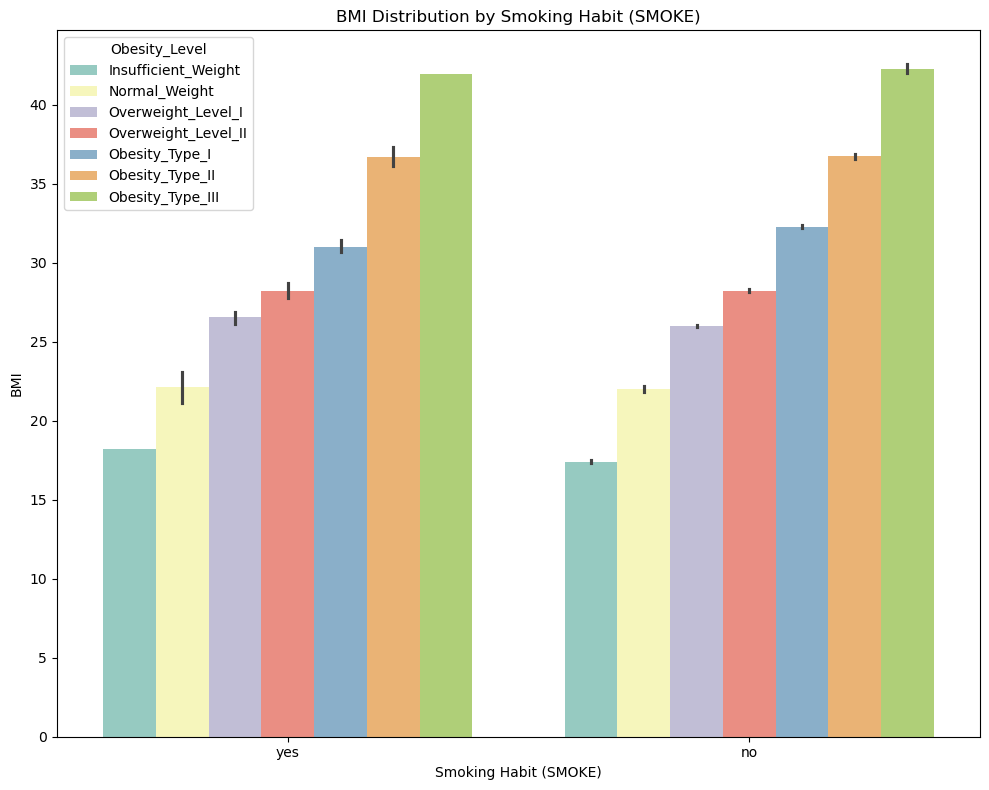

In [615]:
# BMI distribution by Smoking Habit (SMOKE) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))

smoke_order = ['yes', 'no']  

sns.barplot(x='Smoke', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', order=smoke_order, hue_order=nobeyesdad_order, palette='Set3')

plt.title('BMI Distribution by Smoking Habit (SMOKE)')
plt.xlabel('Smoking Habit (SMOKE)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### <span style='color:green'> Observation - Obesity type III dont smokes </span>

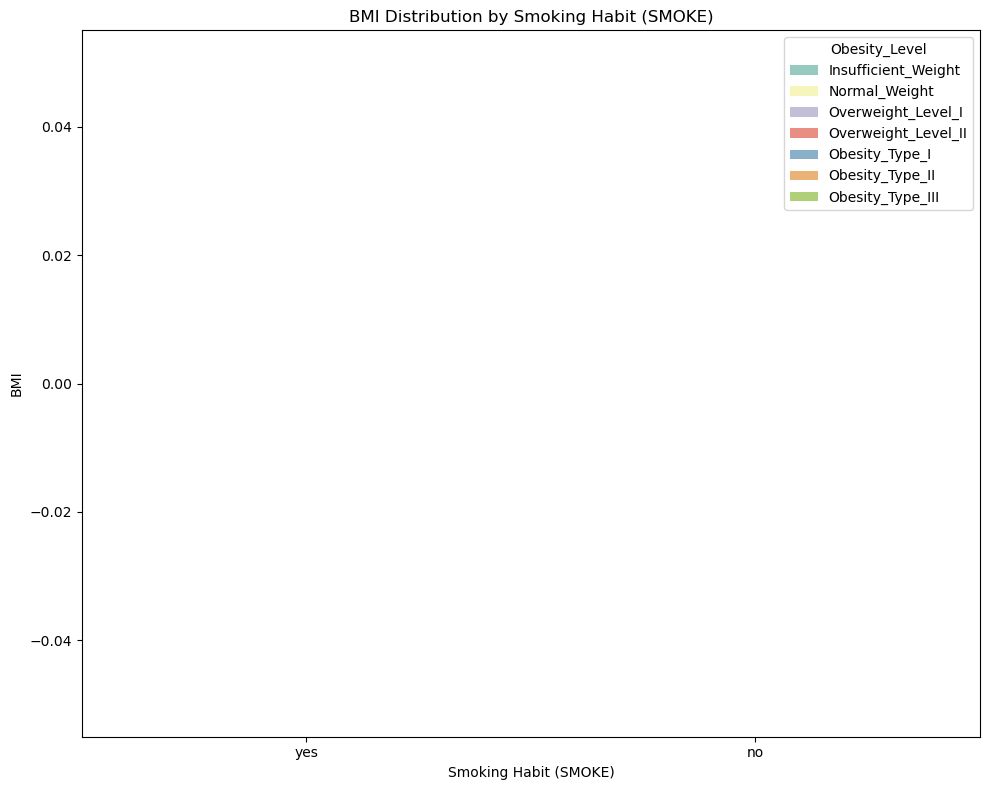

In [616]:
# BMI distribution by Smoking Habit (SMOKE) across different obesity levels (NObeyesdad)

plt.figure(figsize=(10,8))

smoke_order = ['yes', 'no']  

sns.barplot(x='Tech_Use', y='BMI', data=obesity_df_renamed, hue='Obesity_Level', order=smoke_order, hue_order=nobeyesdad_order, palette='Set3')

plt.title('BMI Distribution by Smoking Habit (SMOKE)')
plt.xlabel('Smoking Habit (SMOKE)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

In [617]:
def show_pie_chart(df, column_name):
    
    # Converting string values to categorical
    df[column_name] = df[column_name].astype('category')
    
    # Calculating the frequency of values in the column
    counts = df[column_name].value_counts()

    
    # Sorting the values in the column by their frequency in descending order
    counts_sorted = counts.sort_values(ascending=False)
    
    # subplot
    fig,axes = plt.subplots(1, 2, figsize=(16, 8))
    plt.title(column_name)
    plt.subplots_adjust(wspace = 0.5)
    
   
    axes[0].pie(counts.values, labels=counts_sorted.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    
    sns.countplot(data=df, y=column_name, ax=axes[1], order=counts_sorted.index, palette="pastel", hue=column_name, legend=False, width=0.8)
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    
    for i, v in enumerate(counts_sorted.values):
        axes[1].text(v + 0.1, i, str(v), ha='left', va = 'center', color = 'black', fontweight = 'bold')
    #plt.title(column_name)
    plt.show()

### BMI distribution by public transportation (MTRANS) across different obesity levels (NObeyesdad)

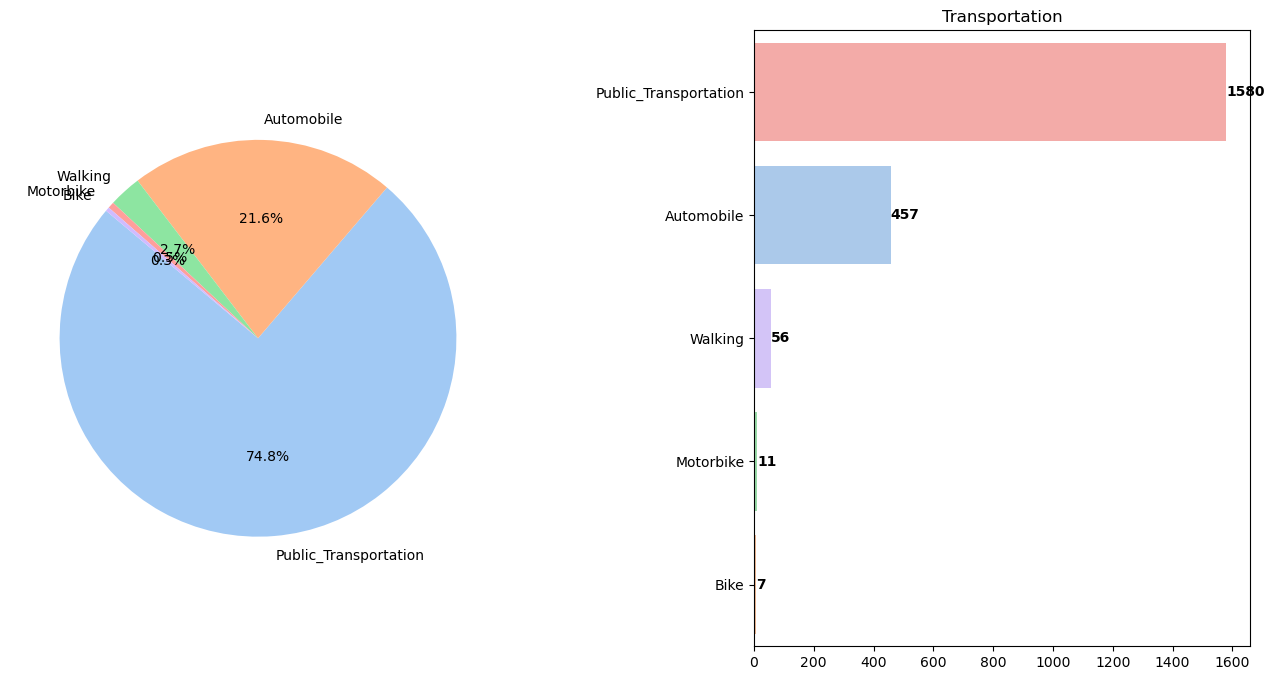

In [618]:
 #Create pie chart for MTRANS
show_pie_chart(obesity_df_renamed, 'Transportation')

### <span style='color:green'> Observation - 97.6% use some form of vehicles while only ~2.7% prefers walking/using bike That's concerning!</span>

### Summary 
1. We have highest number of people with Obesity_Type I
2. On average most people have family history of obsesity.
3. Most people use some form of vehicles while only ~2.7% prefers walking/using bike That's concerning!
4. More female are Obese as compared to male.
5. We noticed a relatively strong positive correlation between the Weight and Height.
6. Outliers are present in Age.
